In [106]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pyplot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(-5.12, 5.12)

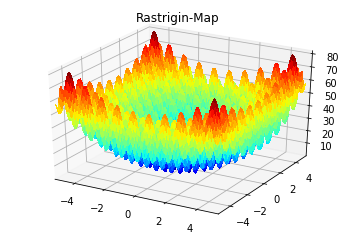

In [21]:
figure = pyplot.figure()
axe = figure.add_subplot(111, projection='3d')
 
x = np.linspace(-5.12, 5.12, 100) # unterteilt den Bereich in 100 Schnitte, ähnlich: np.arange(-5.12, 5.12, 0.1)
y = np.linspace(-5.12, 5.12, 100)
x, y = np.meshgrid(x, y) # erzeugt ein Koordinatensystem
 
# Nun ohne Schleifen: Wir wenden die NumPy-Funktionen (np.cos statt math.cos und np.pi statt math.pi) 
# auf die NumPy-Arrays an (x und y) und erhalten ein NumPy-Array z zurück
 
# Plotte die drei Variablen (x, y, z) im dreidimensionalen Raum
axe.plot_surface(x, y, z, rstride=1, cstride=1, cmap="jet", linewidth=0, antialiased=False)
 
pyplot.title('Rastrigin-Map')
pyplot.grid(True)
axes = pyplot.gca()
axes.set_xlim([-5.12,5.12])
axes.set_ylim([-5.12,5.12])


In [125]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

fspace = {
    'x': hp.uniform('x', -5, 5),
    'y': hp.uniform('y', -5, 5)
}

def rastiridin(x,y):
    return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2* np.pi * y)

def f(params):
    x = params['x']
    y = params['y']
    val = rastiridin(x,y)
    return {'loss': val, 'status': STATUS_OK}

trials = Trials()
N=5000

In [126]:
best = fmin(fn=f, 
            space=fspace,
            algo=tpe.suggest,
            max_evals=N,
            trials=trials)

print( 'best:', best)

print ('trials:')
for trial in trials.trials[:2]:
    print(np.min(trials.losses()))

best: {'x': 0.008697138379726133, 'y': -0.0025483920360279896}
trials:
0.01629109602911072
0.01629109602911072


finite loss range 0.01629109602911072 80.38888401494933 -0.9837089039708893


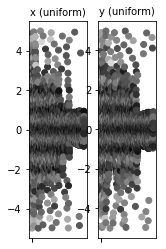

In [127]:
from hyperopt.plotting import main_plot_vars
from hyperopt import base

# setting up your search_space, objective_function, and trials goes here
# see the tutorials to know how

domain = base.Domain(f, fspace)
main_plot_vars(trials, bandit=domain)

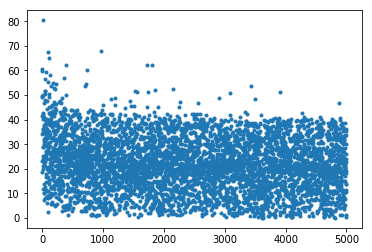

In [128]:
plt.plot(trials.losses(),'.')

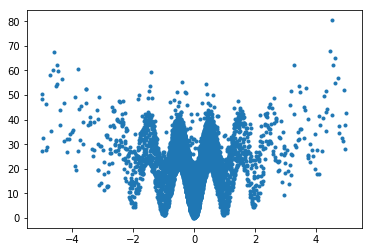

In [129]:
plt.plot(trials.vals["x"],trials.losses(),'.')

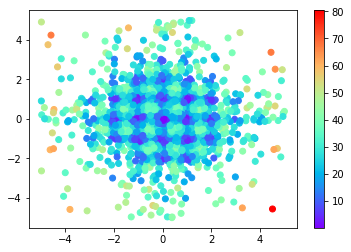

In [130]:
cm = plt.cm.get_cmap('rainbow')
sc = plt.scatter(trials.vals["x"], trials.vals["y"], c=trials.losses(), cmap=cm)
plt.colorbar(sc)

In [131]:
x,y=np.random.uniform(-5,5,N),np.random.uniform(-5,5,N)
losses=rastiridin(x,y)

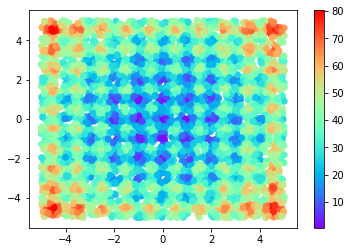

In [132]:
cm = plt.cm.get_cmap('rainbow')
sc = plt.scatter(x, y, c=losses, cmap=cm)
plt.colorbar(sc)

In [123]:
np.min(losses)

4.031472071114029

### How about deciding on a criterion?

In [158]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
iris = datasets.load_diabetes()


In [159]:
X_trn,X_val,y_trn,y_val= train_test_split (iris.data,iris.target,shuffle=True)              

In [160]:
def acc_model(params):
    clf = RandomForestRegressor(**params)
    clf.fit(X_trn,y_trn)
    score=clf.score(X_val,y_val)
    return score

param_space = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', ['log2','auto',1.0]),
    'n_estimators': hp.choice('n_estimators', range(10,100)),
    'criterion': hp.choice('criterion', ["mae", "mse"]),
}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best_params = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best_params)

new best: 0.5139218820954337 {'criterion': 'mae', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 54}
new best: 0.5556366776419978 {'criterion': 'mae', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 81}
new best: 0.5556366776419978 {'criterion': 'mse', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 32}
new best: 0.5556366776419978 {'criterion': 'mse', 'max_depth': 10, 'max_features': 1.0, 'n_estimators': 65}
new best: 0.5556366776419978 {'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 70}
new best: 0.5556366776419978 {'criterion': 'mse', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 56}
new best: 0.5556366776419978 {'criterion': 'mse', 'max_depth': 13, 'max_features': 'auto', 'n_estimators': 71}
new best: 0.5556366776419978 {'criterion': 'mse', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 88}
new best: 0.5556366776419978 {'criterion': 'mae', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 62}
new best

new best: 0.5684749001190446 {'criterion': 'mae', 'max_depth': 18, 'max_features': 'log2', 'n_estimators': 96}
new best: 0.5684749001190446 {'criterion': 'mae', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 96}
new best: 0.5684749001190446 {'criterion': 'mae', 'max_depth': 6, 'max_features': 1.0, 'n_estimators': 37}
new best: 0.5684749001190446 {'criterion': 'mae', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 72}
new best: 0.5684749001190446 {'criterion': 'mae', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 87}
new best: 0.5684749001190446 {'criterion': 'mse', 'max_depth': 1, 'max_features': 1.0, 'n_estimators': 91}
new best: 0.5684749001190446 {'criterion': 'mae', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 14}
new best: 0.5684749001190446 {'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 15}
new best: 0.5684749001190446 {'criterion': 'mae', 'max_depth': 13, 'max_features': 'auto', 'n_estimators': 39}
new best: 0.56

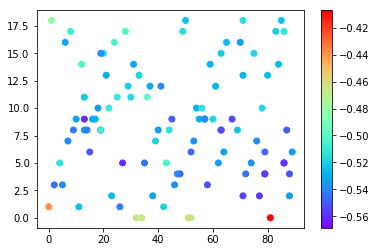

In [161]:
cm = plt.cm.get_cmap('rainbow')
sc=plt.scatter(trials.vals["n_estimators"],trials.vals["max_depth"],c=trials.losses(),cmap=cm)
plt.colorbar(sc)


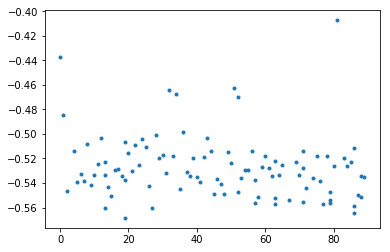

In [162]:
plt.plot(trials.vals["n_estimators"],trials.losses(),'.')
